## Box фильтр

In [1]:
%matplotlib inline

In [2]:
import cv2
import matplotlib.pyplot as plt
import math
import copy
import numpy as np

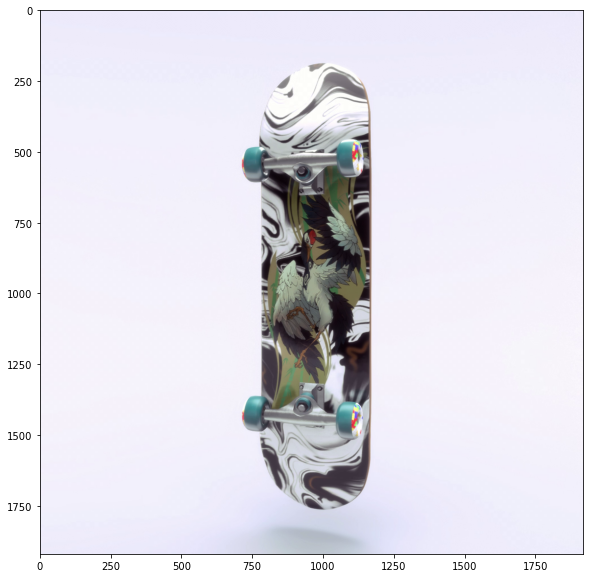

In [3]:
img = cv2.imread("1.png")
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(rgb_img) 
plt.show()

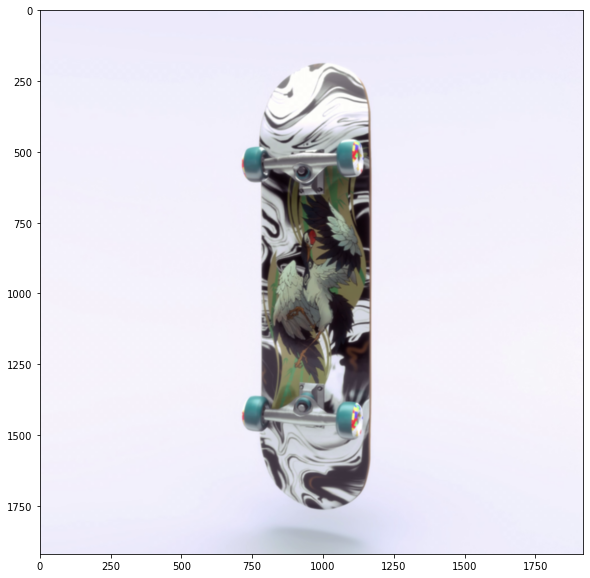

In [4]:
box = cv2.boxFilter(rgb_img,-1,(5,5),normalize=True) 
plt.figure(figsize=(10,10))
plt.imshow(box)
plt.show()

## Оценка времени выполнения

In [5]:
%%timeit -r 4 -n 30

box = cv2.boxFilter(rgb_img,-1,(5,5),normalize=True) 

18.4 ms ± 59.6 µs per loop (mean ± std. dev. of 4 runs, 30 loops each)


Сложность выполнения алгоритма: 
$O$($N$$r$)

$N$ - Количество пикселей изображения.

$r$ - радиус Box фильтра.

## Оценка зависимости времени выполнения от размера Box фильтра.

[0.01064150199999947, 0.011533125999999783, 0.011676441999999732, 0.011685922999999931, 0.01252466999999946, 0.013101580999999918]


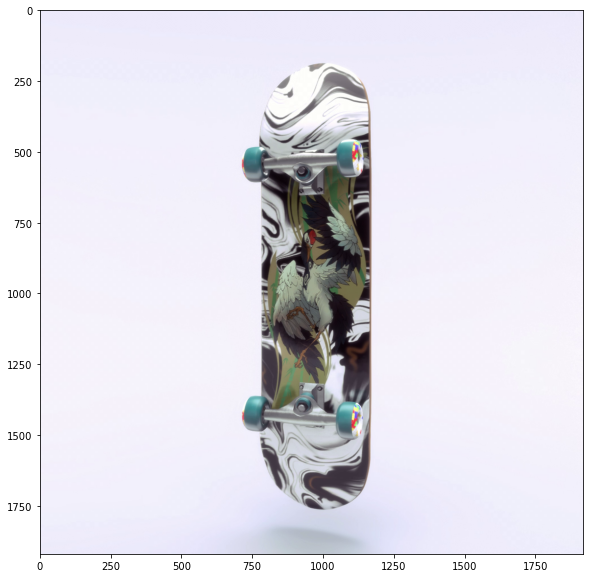

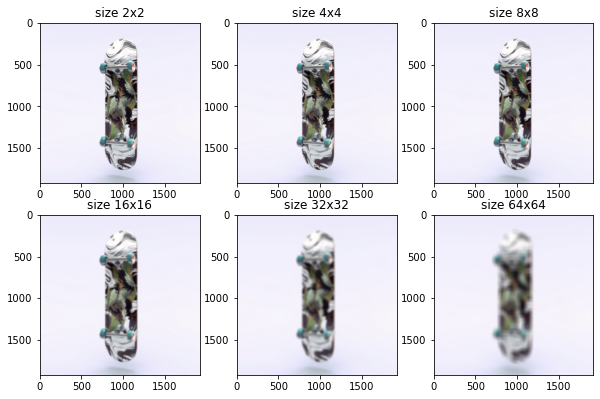

In [6]:
from time import perf_counter

runtime = []
ksize = [2, 4, 8, 16, 32, 64]
img = cv2.imread("1.png")

rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow (rgb_img)

fig = plt.figure(figsize=(10, 10))


for idx, size in enumerate(ksize):
    start_time = perf_counter()
    box_filtred = cv2.boxFilter(rgb_img,-1,(size,size),normalize=True)
    runtime.append(perf_counter() - start_time)
    fig.add_subplot(3, 3, idx + 1)
    plt.title(f"size {size}x{size}")
    plt.imshow(box_filtred)

print(runtime)

Text(0.5, 0, 'Kernel size')

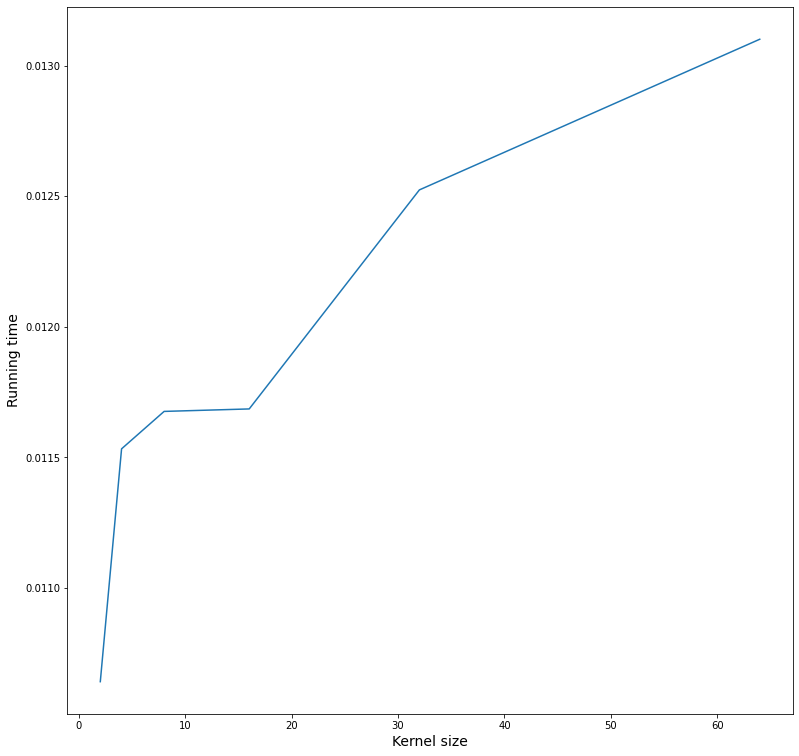

In [7]:
fig2 = plt.figure(figsize=(13,13))
plt.plot(ksize, runtime)
plt.ylabel('Running time', fontsize=14)
plt.xlabel('Kernel size', fontsize=14)

## Сравнение с Гауссовский фильтрацией

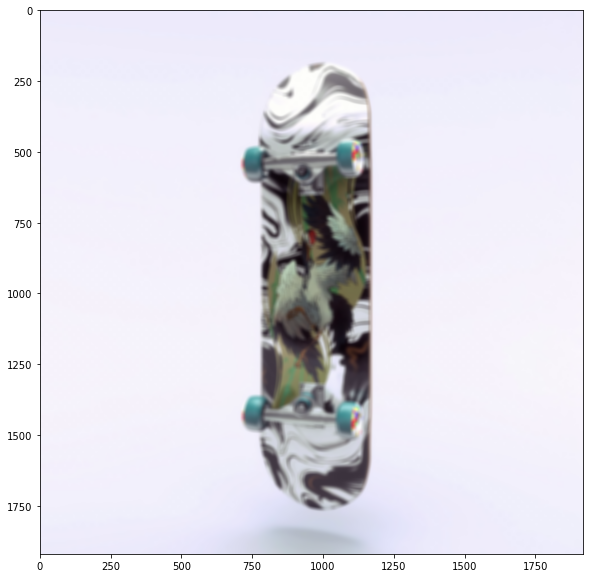

In [8]:
box = cv2.boxFilter(rgb_img,-1,(15,15),normalize=True)
 
plt.figure(figsize=(10,10))
plt.imshow(box)
 
plt.show()

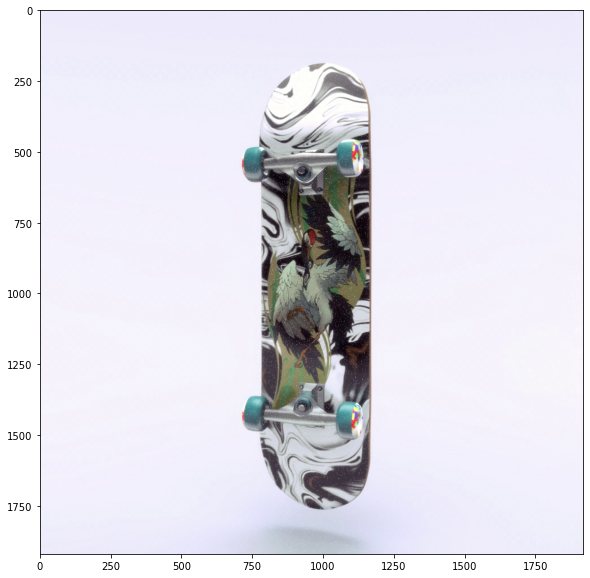

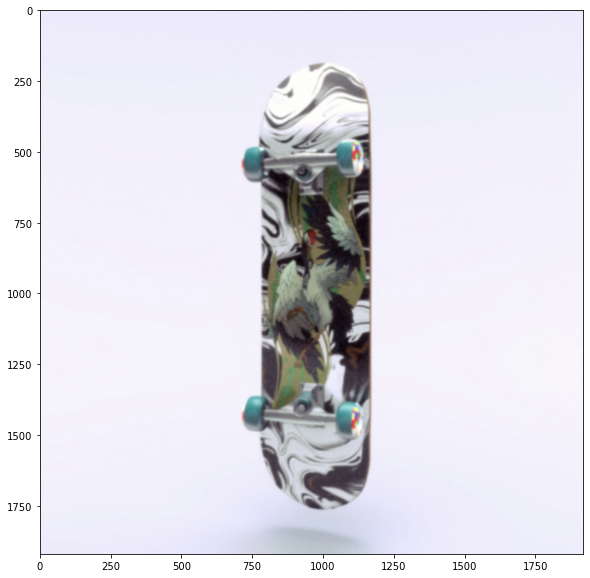

In [9]:
for i in range(50000):  
    temp_x = np.random.randint(0, rgb_img.shape[0])
    temp_y = np.random.randint(0, rgb_img.shape[1])
    rgb_img[temp_x][temp_y] = 255

plt.figure(figsize=(10,10))
plt.imshow(rgb_img)

gauss = cv2.GaussianBlur(rgb_img,(15,15),0)
plt.figure(figsize=(10,10))
plt.imshow(gauss)


plt.show()

### Box filer
Помимо подавления шума портит резкие границы и размывает мелкие детали изображения
### Gaussian filter 
Меньше размывает мелкие детали, лучше убирает шум 